In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans2
from numpy.linalg import *


![](iris.png)


In [5]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:150]
y = data.target[:150]
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Standardize features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


For i = 0:
For i = 1:
For i = 2:


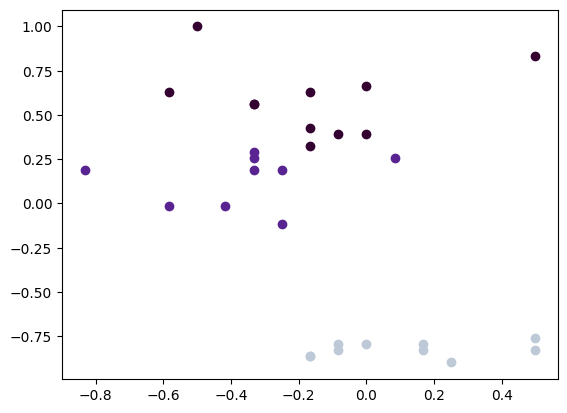

In [9]:
for i in range(3):
    print(f'For i = {i}:')
    new_X = X_test[y_test==i]
    plt.plot(new_X[:,1], new_X[:,2], 'o', c=np.random.random(3))
    


In [21]:
import numpy as np
import matplotlib.pyplot  as plt


def forward(z, v, w):
    n, m = v.shape
    x = np.ones((m, 1)) * -1.0 
    h = np.ones((n+1, 1)) * -1.0

    x[:-1, 0] = z

    hNet = np.dot(v, x)
    h[:-1, :] = 1.0 / (1.0 + np.e**(-hNet))

    oNet = np.dot(w, h)
    y = 1.0/(1.0 + np.e**(-oNet))
    return x, h, y

def backward(x, t, h, y, v, w, eta, hDelta_p, oDelta_p):
    error = t - y
    odelta = error * (1.0 - y) * y
    oDelta = eta * np.dot(odelta, h.T)
    
    hdelta = np.dot(w.T,odelta) * (1.0 - h)* h
    hdelta = hdelta[:-1,:]

    hDelta = eta * np.dot(hdelta, x.T)
    
    w += oDelta + alpha * oDelta_p
    v += hDelta + alpha * hDelta_p
    
    return hDelta, oDelta

def ffbp(z, t, v, w, eta, train = False):
    count = 0
    o,_ = w.shape
    outputs = np.zeros((len(t), 1))
    hDelta, oDelta = 0,0
    identity = np.identity(o , dtype=int).tolist()
    MSEr = np.zeros((len(t), o))
    if o > 1:
        ta = np.array([identity[j[0]] for j in t])
    else:
        ta = t
    for i in range(len(t)):
        x, h, y = forward(z[i], v, w)
        if o > 1:
            tb = np.array([identity[j] for j in t[i]])
            tb.shape = (o,1)
            MSEr[i,:] = (tb - y)[:,0]
            outputs[i] = np.argmax(y)
        else:
            tb = t[i]
            MSEr[i,:] = tb - y[0]
            outputs[i] = 0 if y[0] < 0.5 else 1
            #outputs[i] = y[0]
            
        if train == True:
            hDelta, oDelta = backward(x, tb, h, y, v, w, eta, hDelta, oDelta)
    
    MSEi = norm(t - outputs)/float(len(t))
    MSEr = norm(MSEr)/ float(len(t))
    missClass = t - outputs
    missClass[missClass != 0 ] = 1
    return MSEi, MSEr, missClass.sum()




def training(m, n, o, eta, alpha, epochs, min_error):
    v = -2.0 + np.random.random((n, m + 1)) * 4.0
    w = -2.0 + np.random.random((o, n + 1)) * 4.0
    MSErList = []
    idx = np.arange(len(t))
    min_MSEr = 100
    v_best = None
    w_best = None
    for i in range(epochs):
        np.random.shuffle(idx)
        MSEi, MSEr, missClass = ffbp(z[idx], t[idx], v, w, eta,  True)
        MSErList.append(MSEr)
        
        if min_MSEr > MSEr: 
            min_MSEr = MSEr
            v_best = v.copy()
            w_best = w.copy()
        if MSEr < min_error or missClass ==0 : break   
    print('min_MSEr', min_MSEr)
    return v_best, w_best, MSErList, missClass
        

min_MSEr 0.022704896607830642


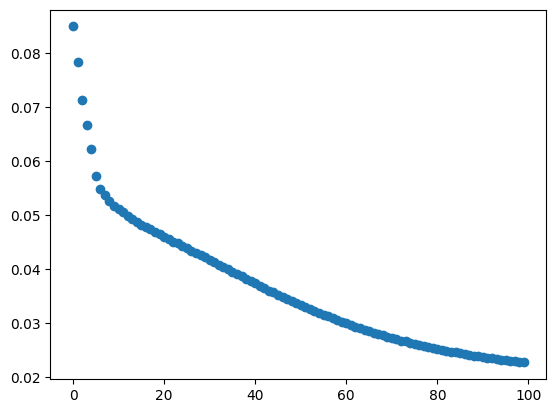

0.03333333333333333 0.039765811363546906 1.0 0.9666666666666667
30


In [22]:
z = X_train
t = y_train
#t = np.eye(np.max(y_train) + 1)[y_train.ravel()]

t.shape = (len(t),1)
alpha = 0.01

m = 4
n = 6
o = 3
min_error = 0.01
epochs = 100
eta = 0.1
v, w, MSErList, missClass = training(m, n, o, eta, alpha, epochs, min_error)

plt.plot(np.arange(len(MSErList)),np.array(MSErList),"o")
plt.show()

z = X_test
t = y_test
t.shape = (len(t),1)
MSEi, MSEr, missClass = ffbp(z, t, v, w, eta)

print (MSEi, MSEr, missClass, 1.0-missClass/len(t))
print (len(t))
